# Step 1. Web scratch for  the finance data

## 1.1 Finance data

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
plt.rcParams['figure.figsize']=(20,10)
# style.use("seaborn")
import requests
import json
import numpy as np
from urllib import parse
from datetime import datetime
import time
from matplotlib import pyplot

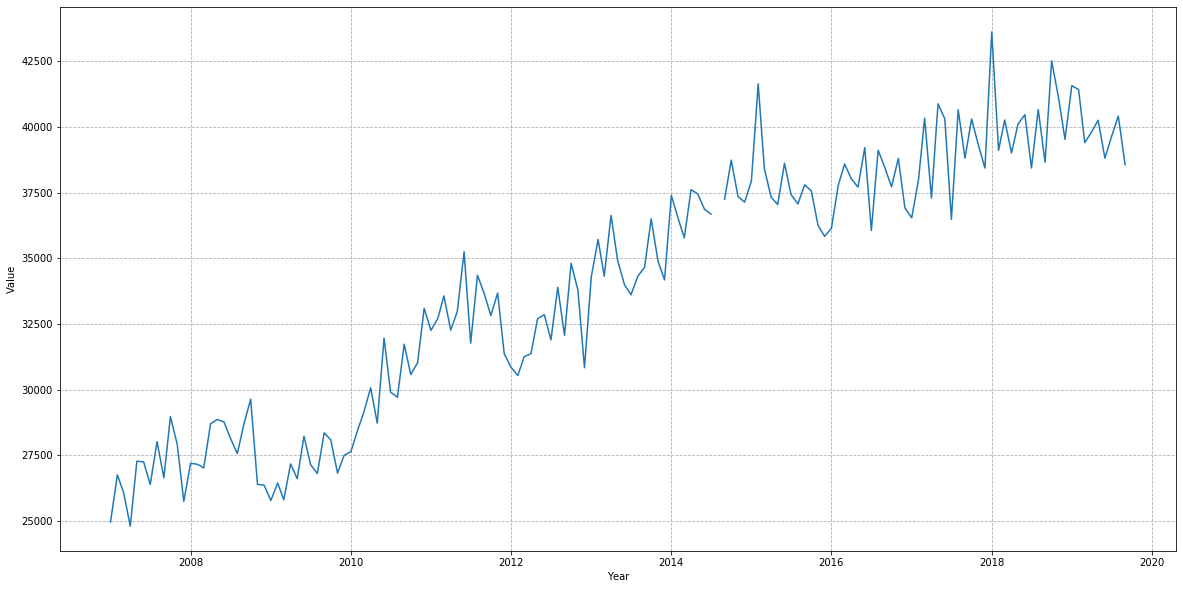

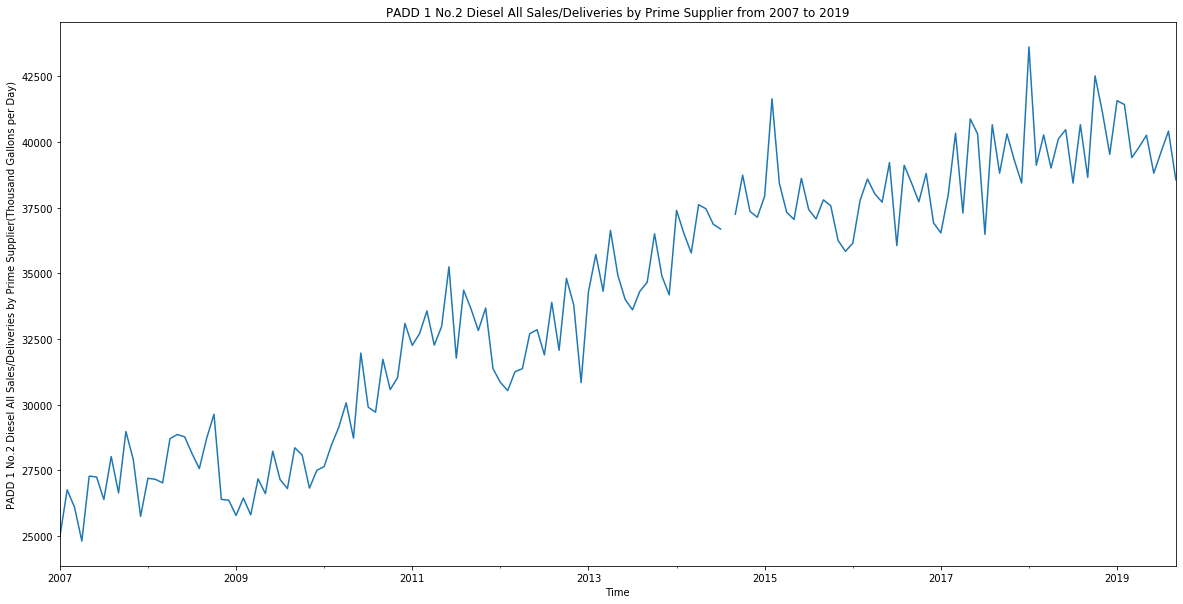

In [2]:
urlformat = "http://api.eia.gov/series/?api_key={}&series_id=PET.C720010001.M"
Key = "785919979cec4205e9f2210244b0c78b"
url = urlformat.format(Key)
feedback = requests.get(url)
res = json.loads(feedback.text)

df = res['series'][0]['data']

Year = [i[0][:4] + '-' + i[0][4:] for i in df]
ind = [datetime.strptime(i, "%Y-%m") for i in Year]
value = [i[1] for i in df]


urlformat2 = "http://api.eia.gov/series/?api_key={}&series_id=PET.EMD_EPD2DXL0_PTE_R10_DPG.M"
Key = "785919979cec4205e9f2210244b0c78b"
url2 = urlformat2.format(Key)
feedback2 = requests.get(url2)
res2 = json.loads(feedback2.text)

df2 = res2['series'][0]['data']
Year2 = [i[0][:4] + '-' + i[0][4:] for i in df2]
ind2 = [datetime.strptime(i, "%Y-%m") for i in Year2]
value2 = [i[1] for i in df2]

## we can see has nan value
plt.plot(ind, value)
plt.xlabel('Year')
plt.ylabel('Value')
ax = plt.gca()
ax.xaxis.grid(True, which='Major', linestyle='--')
ax.yaxis.grid(True, which='Major', linestyle='--')

# switch to pandas
df1 = pd.DataFrame(index = ind)
df2 = pd.DataFrame(index = ind2)
df1['diesel_sales'] = np.array(value)
df2['diesel_price'] = np.array(value2)
df1 = df1[::-1]
df2 = df2[::-1]
df1.plot(legend=None)
plt.title('PADD 1 No.2 Diesel All Sales/Deliveries by Prime Supplier from 2007 to 2019')
plt.xlabel('Time')
plt.ylabel('PADD 1 No.2 Diesel All Sales/Deliveries by Prime Supplier(Thousand Gallons per Day)')


# DJI -- > I switched to SPY 500 --> more accurate!! 
#stocks = ['^GSPC','RDS-A', 'HFC', 'UPS', 'FDX', 'MSM', 'TSLA']
stocks = ['^GSPC','RDS-A', 'HFC', 'UPS', 'FDX', 'MSM']
new_data = pd.DataFrame(index = df1.index)
new_data['diesel_sales'] = df1
new_data['diesel_price'] = df2
for i in stocks:
    stock = web.get_data_yahoo(i,'01/01/2007','09/02/2019',interval='m')
    stock = pd.DataFrame(data=stock['Adj Close'])
    new_data[i] = stock

In [3]:
new_data.dropna(inplace=True)

In [4]:
df1 = new_data / new_data.iloc[0,:]

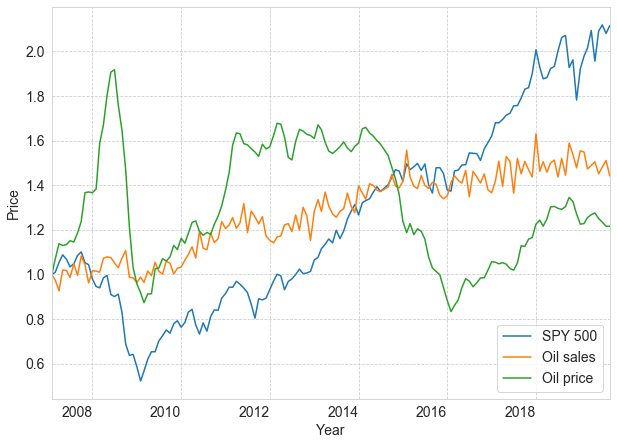

In [22]:
df1[['^GSPC', 'diesel_sales', 'diesel_price']].plot(figsize=(10,8))
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 14)
ax.yaxis.set_tick_params(labelsize = 14)
ax.xaxis.grid(True, which='Major', linestyle='--')
ax.yaxis.grid(True, which='Major', linestyle='--')

for xlabel in ax.axes.get_xticklabels():
    xlabel.set_rotation(0)
    
#plt.title('Temperature from 2007 to 2019', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(['SPY 500', 'Oil sales', 'Oil price'],fontsize = 14)
plt.show()

## 1.2 Temperature data

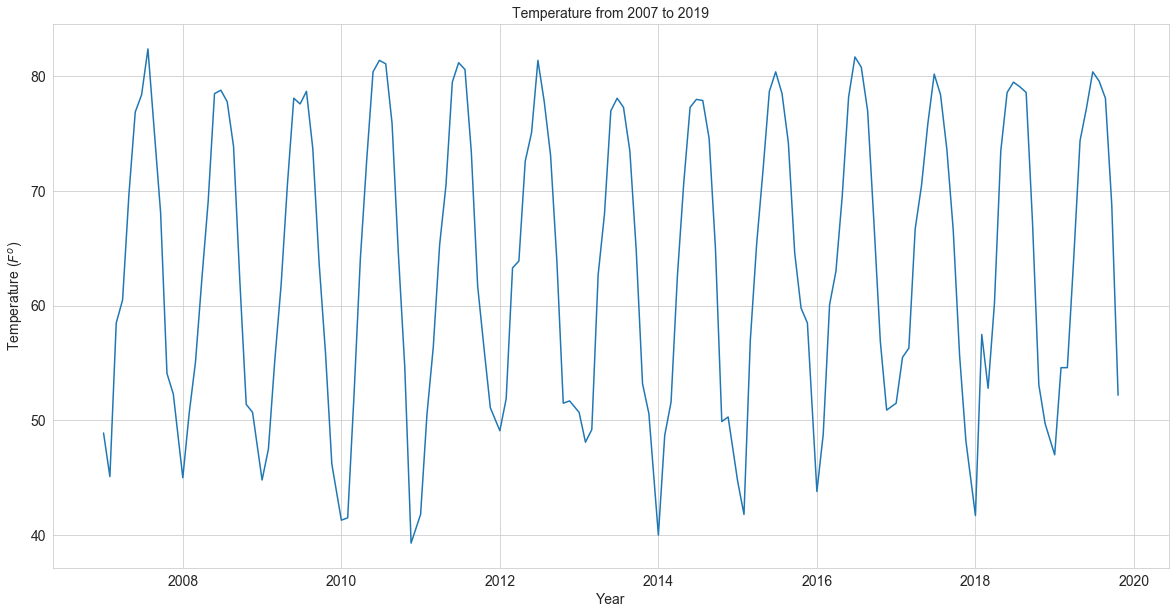

In [23]:
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt

URL = "https://sercc.com/climateinfo_files/monthly/Southeast_temp_DivNew_files/sheet001.htm"

reply = requests.get(URL)

with open('test.html', 'w') as f:
    f.write(reply.text)

data = {}
year = 2007
start = False
with open('test.html', 'r') as f:
    soup = BeautifulSoup(f, 'html.parser')
    for a in soup.find_all("td"):
        try:
            b = float(a.text)
        except:
            if start and a.text == "":
                break
            else:
                continue
        if b >= 2007 and b <= 2019:
            year = b
            start = True
        elif start:
            if year not in data.keys():
                data[year] = []
            data[year].append(b)


for year in data.keys():
    if len(data[year]) == 13:
        data[year] = data[year][:-1]

x = []
y = []
for year in data.keys():
    for i, temp in enumerate(data[year]):
        x.append(year+0.08*i)
        y.append(temp)



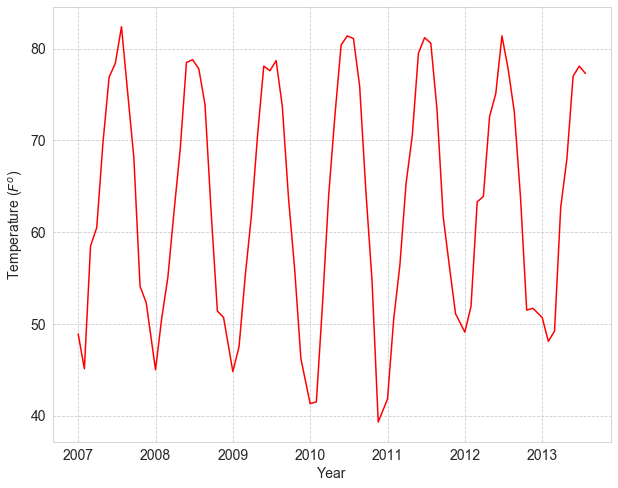

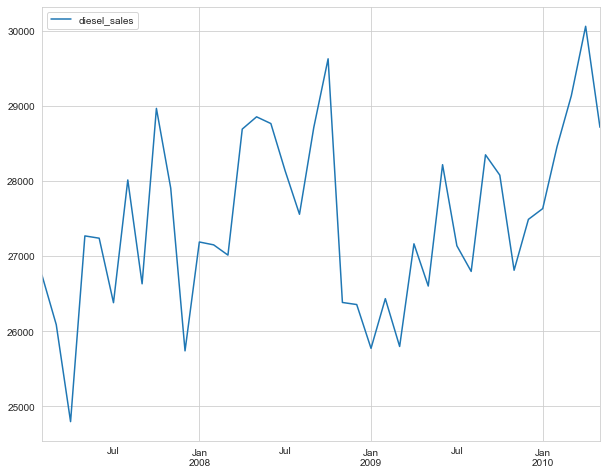

In [51]:
plt.figure(figsize=(10,8))
plt.plot(x[:80], y[:80], c='r')

# frame = plt.gca()
# for xlabel in frame.axes.get_xticklabels():
#     xlabel.set_rotation(90)

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 14)
ax.yaxis.set_tick_params(labelsize = 14)
ax.xaxis.grid(True, which="Major", linestyle='--')
ax.yaxis.grid(True, which='Major', linestyle='--')
#plt.title('Temperature from 2007 to 2019', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature ($F^{o}$)', fontsize=14)
plt.show()

new_data[["diesel_sales"]].iloc[:40].plot(figsize=(10,8))

# 2 Data analysis

In [44]:
import pandas as pd
start = '2007/1/1'
end = '2020/1/1'
idx = pd.date_range(start, end, freq='MS')[: len(y)]
Temperature = pd.DataFrame(index=idx)
Temperature['Temp'] = y

In [8]:
new_data.isnull().any()

diesel_sales    False
diesel_price    False
^GSPC           False
RDS-A           False
HFC             False
UPS             False
FDX             False
MSM             False
dtype: bool

### Define a new ultimate dataset

In [10]:
ultimate = pd.concat([Temperature, new_data],axis=1)

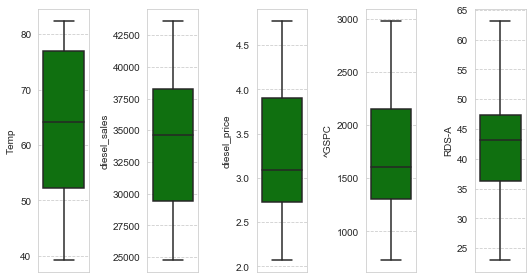

In [12]:
import seaborn as sns
l = ultimate.columns[:5].values
number_of_columns = len(l)
number_of_rows = (len(l) -1)/number_of_columns
plt.figure(figsize=(1.5*number_of_columns,number_of_columns*number_of_rows ))

for i in range(0, len(l)):
    plt.subplot(number_of_rows+1, number_of_columns, i+1)
    ax = plt.gca()
    ax.yaxis.grid(True, which='Major', linestyle='--')
    sns.set_style('whitegrid')
    sns.boxplot(ultimate[l[i]], color='green', orient='v')
plt.tight_layout()

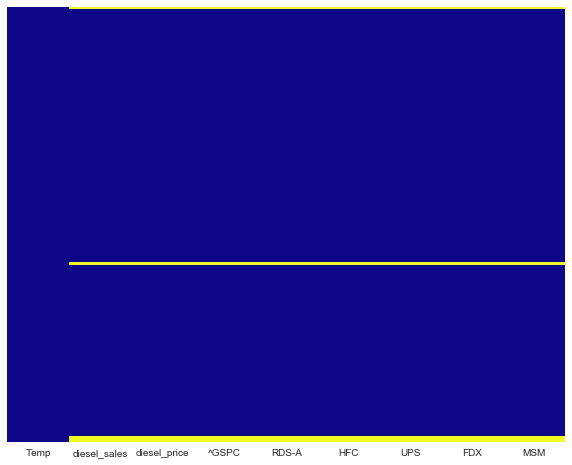

In [13]:
# detect nan value
plt.figure(figsize=(10,8))
sns.heatmap(ultimate.isnull(), cbar=False, yticklabels=False, cmap='plasma')

In [53]:
# delete nan value
ultimate.dropna(inplace=True)

## 2.2 Calculate correlation

In [54]:
import scipy.stats
a = []
for i in ultimate.columns:
    b = []
    for j in ultimate.columns:
        b.append(scipy.stats.pearsonr(ultimate[i].values,ultimate[j].values)[0])
    a.append(b)

[Text(0, 0.5, 'Temp'),
 Text(0, 1.5, 'diesel_sales'),
 Text(0, 2.5, 'diesel_price'),
 Text(0, 3.5, '^GSPC'),
 Text(0, 4.5, 'RDS-A'),
 Text(0, 5.5, 'HFC'),
 Text(0, 6.5, 'UPS'),
 Text(0, 7.5, 'FDX'),
 Text(0, 8.5, 'MSM')]

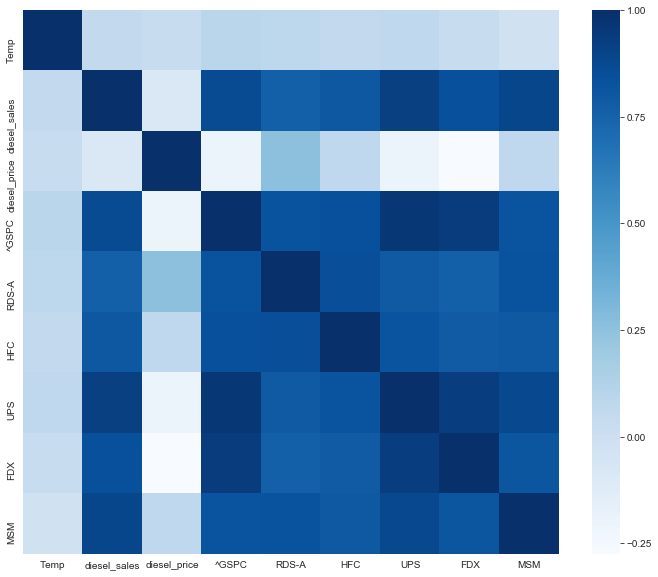

In [55]:

plt.figure(figsize=(12,10))
sns.heatmap(a, cmap='Blues')
ax = plt.gca()
ax.set_xticklabels(ultimate.columns)
ax.set_yticklabels(ultimate.columns)

# Normalization for the ultimate

In [56]:
ultimate = ultimate / ultimate.iloc[0,:]

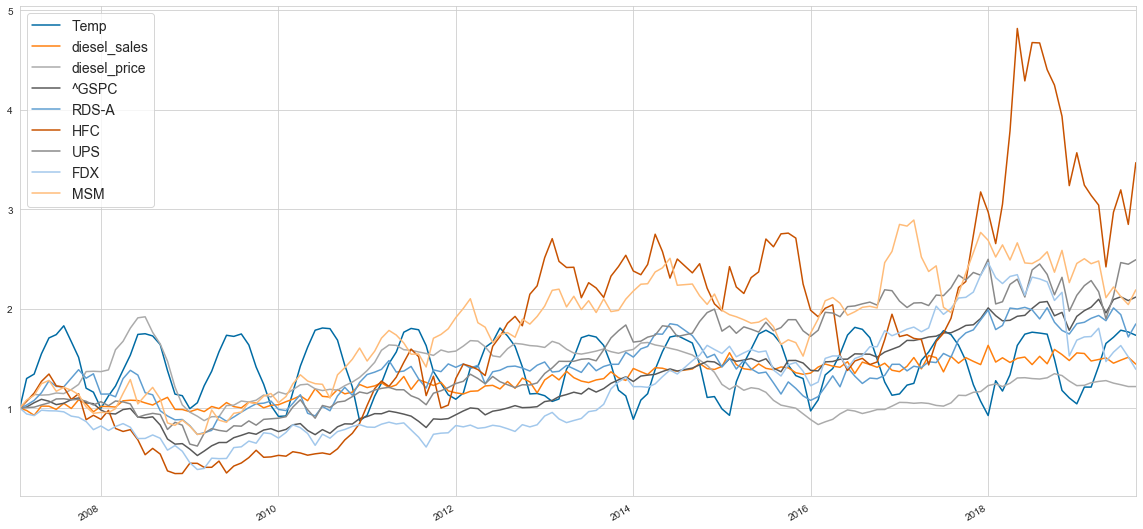

In [57]:
style.use('tableau-colorblind10')
# %matplotlib inline
# ax = plt.subplot()
# for i in ultimate.columns:
#     if i == 'diesel':
#         ax = plt.plot(ultimate.index, ultimate[[i]], c = 'r')
#     else:
#         ax = plt.plot(ultimate.index, ultimate[[i]], c = 'grey')

ultimate.plot(figsize=(20,10))
plt.legend(fontsize=14, loc=2)

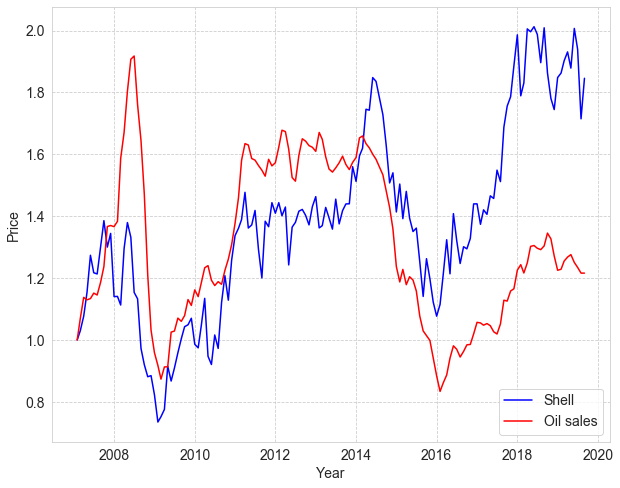

In [71]:
symbols = ['RDS-A', 'diesel_price']
cm = [ 'blue', 'red']
i = 0
plt.figure(figsize=(10,8))
for symbol in symbols: 
    plt.plot(ultimate[symbol].index, ultimate[symbol], c = cm[i])
    plt.legend(['Shell', 'diesel_price'], fontsize = 14)
    i+=1
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 14)
ax.yaxis.set_tick_params(labelsize = 14)
ax.xaxis.grid(True, which='Major', linestyle='--')
ax.yaxis.grid(True, which='Major', linestyle='--')

for xlabel in ax.axes.get_xticklabels():
    xlabel.set_rotation(0)
    
#plt.title('Temperature from 2007 to 2019', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(['Shell', 'Oil sales', 'Oil price'],fontsize = 14)
plt.show()

In [73]:
style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [88]:
style.use('seaborn-whitegrid')

In [75]:
ultimate.corr(method='pearson')

,Temp,diesel_price,^GSPC,RDS-A,HFC,UPS,FDX,MSM
Temp,1.000000,0.033744,0.092889,0.081145,0.061696,0.069684,0.035893,-0.019904
diesel_price,0.033744,1.000000,-0.204651,0.260891,0.073386,-0.199818,-0.274484,0.070060
^GSPC,0.092889,-0.204651,1.000000,0.832561,0.841267,0.964334,0.938748,0.825927
RDS-A,0.081145,0.260891,0.832561,1.000000,0.853761,0.795872,0.761364,0.831143
HFC,0.061696,0.073386,0.841267,0.853761,1.000000,0.827982,0.786223,0.800747
UPS,0.069684,-0.199818,0.964334,0.795872,0.827982,1.000000,0.934723,0.882766
FDX,0.035893,-0.274484,0.938748,0.761364,0.786223,0.934723,1.000000,0.815411
MSM,-0.019904,0.070060,0.825927,0.831143,0.800747,0.882766,0.815411,1.000000


## Multi-variate regression

In [76]:
import sklearn as sk
from sklearn import linear_model

In [79]:
x = ultimate[['Temp', '^GSPC', 'RDS-A', 'HFC', 'UPS', 'FDX', 'MSM']]
y = ultimate[['diesel_price']]

In [80]:
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

In [81]:
predictions = lm.predict(x)

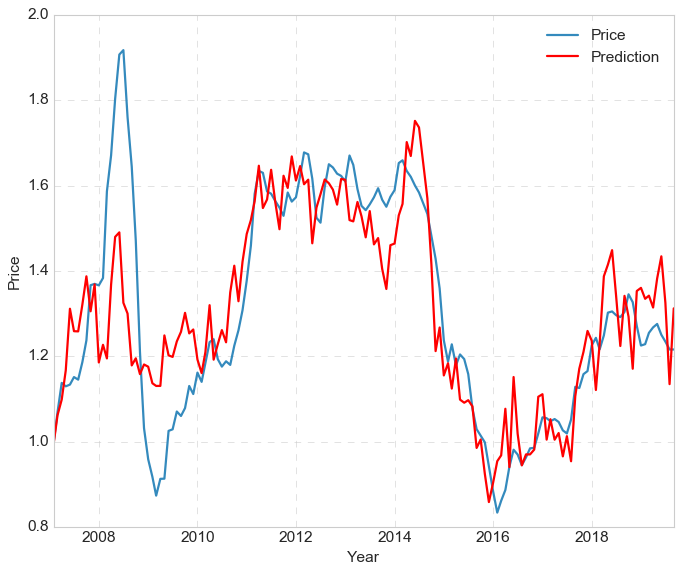

In [91]:
plt.figure(figsize=(10,8))
plt.plot(y)
plt.plot(y.index, predictions, c='r')
#plt.title('ture value')
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 14)
ax.yaxis.set_tick_params(labelsize = 14)
ax.xaxis.grid(True, which='Major', linestyle='--')
ax.yaxis.grid(True, which='Major', linestyle='--')

for xlabel in ax.axes.get_xticklabels():
    xlabel.set_rotation(0)
    
#plt.title('Temperature from 2007 to 2019', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(['Price', 'Prediction', 'Oil price'],fontsize = 14)
plt.show()

In [93]:
# r2 
lm.score(x,y)

0.6936833779750561

## predict sales

In [94]:
x = ultimate[['Temp', '^GSPC', 'RDS-A', 'HFC', 'UPS', 'FDX', 'MSM', 'diesel_price']]
y = ultimate[['diesel_sales']]

In [95]:
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

In [96]:
predictions = lm.predict(x)

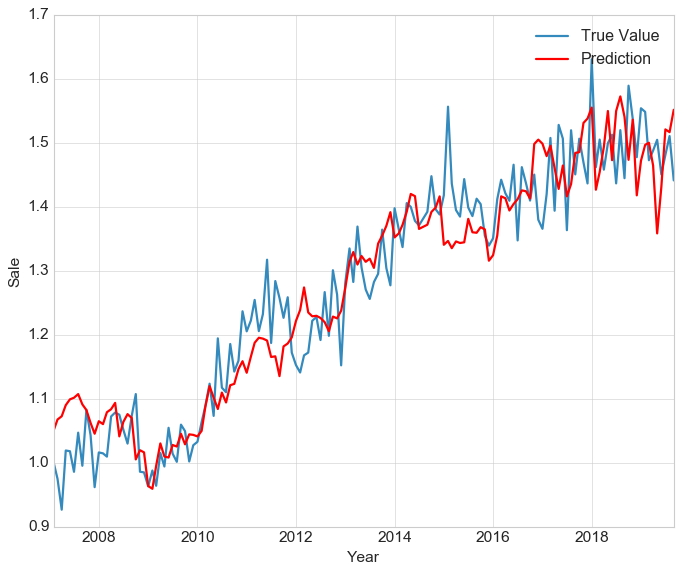

In [98]:
plt.figure(figsize=(10,8))
plt.plot(y)
plt.plot(y.index, predictions, c='r')


ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 14)
ax.yaxis.set_tick_params(labelsize = 14)
plt.legend(['True Value', 'Prediction'])
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sale', fontsize=14)

plt.show()

In [97]:
lm.score(x,y)

0.8862579808297814